In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import pandas as pd
import os
import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
#from bag_of_words import ParseData
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer

%load_ext autoreload
%autoreload 2

2022-04-23 23:43:59.655911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/lib64
2022-04-23 23:43:59.655932: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Conferences
conf = ['acl_2017', 'arxiv.cs.ai_2007-2017', 'arxiv.cs.cl_2007-2017', 'arxiv.cs.lg_2007-2017', 'conll_2016', 'iclr_2017']

# JSON files to be parsed
dir_path    = '../PeerRead/data/'
train_path  = '/train/reviews/'
test_path   = '/test/reviews/'

In [14]:
from Dataparser import get_all_json, create_dataframe, create_label_df, preprocess_text
import pandas as pd

datapath = '../PeerRead/data/'
paths = {
  'acl': 'acl_2017',
  'cs_ai': 'arxiv.cs.ai_2007-2017',
  'cs_cl': 'arxiv.cs.cl_2007-2017',
  'cs_lg': 'arxiv.cs.lg_2007-2017',
  'conll': 'conll_2016',
  'iclr': 'iclr_2017',
  'nips': 'nips_2013-2017'
}

dataset_names = ['acl', 'cs_ai', 'cs_cl', 'cs_lg', 'conll', 'iclr']
num_datasets = len(dataset_names)
dataset_data = [get_all_json(datapath + paths[s]) for s in dataset_names]

parent_paths = [datapath + paths[s] for s in dataset_names]
review_paths = sum([[path + '/dev/reviews', path + '/test/reviews', path + '/train/reviews'] for path in parent_paths], [])

training_data = [create_dataframe(data[4], data[5], dataset_name=i) for i,data in enumerate(dataset_data)]
testing_data = [create_dataframe(data[2], data[3]) for data in dataset_data]

testing_dfs = [pd.DataFrame(testing_data[i]) for i in range(num_datasets)]
training_dfs = [pd.DataFrame(training_data[i]) for i in range(num_datasets)]

### only labels
'''
test_label_data = [create_label_df(review_path,testing_df=testing_dfs[i//3]) for i, review_path in enumerate(review_paths)]
train_label_data = [create_label_df(review_path,testing_df=training_dfs[i//3]) for i, review_path in enumerate(review_paths)]


test_label_dfs = [pd.DataFrame(test_label_data[i]) for i in range(num_datasets)]
train_label_dfs = [pd.DataFrame(train_label_data[i]) for i in range(num_datasets)]
'''
##
testing_dfs[1]

,id,title,titleLen,numAuthors,numReferences,numCitedReferences,numRecentReferences,avgCitedRefLength,abstract,abstractLength,avgReviewerConf,avgOrig,avgAppro,avgImpact,avgClarity,accepted
0,1409.2399,Prioritized Planning Algorithms for Trajectory Coordination of Multiple Mobile Robots,85,4,19,22,0,152.454545,"An important capability of autonomous multi-robot systems is to prevent collision among the individual robots. One approach to this problem is to plan conflict-free trajectories and let each of the robots follow its pre-planned trajectory. A widely used practical method for multi-robot trajectory planning is prioritized planning, which has been shown to be effective in practice, but is in general incomplete. Formal analysis of instances that are provably solvable by prioritized planning is still missing. Moreover, prioritized planning is a centralized algorithm, which may be in many situations undesirable.",613,None,None,None,None,None,0
1,1511.00916,Lowering the learning curve for declarative programming: a Python API for the IDP system,88,1,10,11,0,125.454545,"Programmers may be hesitant to use declarative systems, because of the associated learning curve. In this paper, we present an API that integrates the IDP Knowledge Base system into the Python programming language. IDP is a state-of-the-art logical system, which uses SAT, SMT, Logic Programming and Answer Set Programming technology. Python is currently one of the most widely used (teaching) languages for programming. The first goal of our API is to allow a Python programmer to use the declarative power of IDP, without needing to learn any new syntax or semantics. The second goal is allow IDP to be added to/removed from an existing code base with minimal changes.",670,None,None,None,None,None,0
2,1512.07143,SR-Clustering: Semantic Regularized Clustering for Egocentric Photo Streams Segmentation,88,6,34,71,3,147.295775,"While wearable cameras are becoming increasingly popular, locating relevant information in large unstructured collections of egocentric images is still a tedious and time consuming processes. This paper addresses the problem of organizing egocentric photo streams acquired by a wearable camera into semantically meaningful segments. First, contextual and semantic information is extracted for each image by employing a Convolutional Neural Networks approach. Later, by integrating language processing, a vocabulary of concepts is defined in a semantic space. Finally, by exploiting the temporal coherence in photo streams, images which share contextual and semantic attributes are grouped together. The resulting temporal segmentation is particularly suited for further analysis, ranging from activity and event recognition to semantic indexing and summarization. Experiments over egocentric sets of nearly 17,000 images, show that the proposed approach outperforms state-of-the-art methods.",991,None,None,None,None,None,0
3,1503.06902,A Note on Information-Directed Sampling and Thompson Sampling,61,1,6,17,0,125.235294,"This note introduce three Bayesian style Multi-armed bandit algorithms: Information-directed sampling, Thompson Sampling and Generalized Thompson Sampling. The goal is to give an intuitive explanation for these three algorithms and their regret bounds, and provide some derivations that are omitted in the original papers.",322,None,None,None,None,None,0
4,1704.01944,The quality of priority ratios estimation in relation to a selected prioritization procedure and consistency measure for a Pairwise Comparison Matrix,149,1,29,58,0,312.224138,"An overview of current debates and contemporary research devoted to the modeling of decision making processes and their facilitation directs attention to the Analytic Hierarchy Process (AHP). At the core of the AHP are various prioritization procedures (PPs) and consistency measures (CMs) for a Pairwise Comparison Matrix (PCM) which, in a sense, reflects preferences of decision makers. Certainly, when judgments abou

In [16]:
train_title = []
test_title  = []
train_label = []
test_label  = []

for i in range(num_datasets):  
    for n in range(len(training_data[i])):
        #print(training_data[i][n]['title'])
        train_title.extend([training_data[i][n]['title']])
        train_label.extend([training_data[i][n]['accepted']])
        
    for k in range(len(testing_data[i])):
        test_title.extend([testing_data[i][k]['title']])
        test_label.extend([testing_data[i][k]['accepted']])

## support for old code
merged_data = []
merged_data.extend(train_title)
merged_data.extend(test_title)

## title only test
train_data = train_title
test_data = test_title

print(len(merged_data), len(train_data), len(test_data))

11727 11090 637


In [17]:
from Dataparser import preprocess_text

# Getting bag of words definition from our corpus of data
bowVec = CountVectorizer(ngram_range=(1,1), preprocessor=preprocess_text, stop_words='english')
bowVec = bowVec.fit(merged_data)

## get BOW feature rep
X_train = bowVec.transform(train_data)  
X_test = bowVec.transform(test_data)

print(X_train.shape, X_test.shape, len(train_data))

## display 
cv_dataframe = pd.DataFrame(X_train.toarray(),columns=bowVec.get_feature_names_out())
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
display(cv_dataframe.head(5).loc[:,cv_dataframe.head(5).any()])

(11090, 9172) (637, 9172) 11090


,additivity,answering,attachment,attention,aware,base,behaviors,cold,colloquial,combining,...,singaporean,skip,spam,start,texts,token,uniform,universal,vector,zipf
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,1,1,1,0,0,0,0,0


In [18]:
# Dimension reduction on BOW using SVD
on_svd = False

svd = TruncatedSVD(n_components=500, n_iter=10, random_state=42)
X_new = svd.fit(X_train)
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)

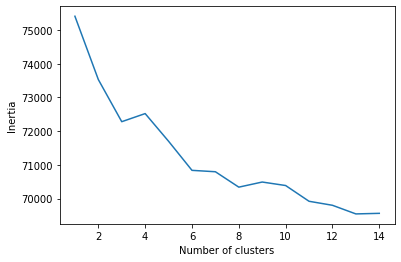

In [19]:
# Cluster documents based on BOW model
bow_distortions = []
K = range(1,15)

for k in K:
    bow_model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10)
    if(on_svd):
        bow_model.fit(X_train_svd)
    else:
        bow_model.fit(X_train)
    bow_distortions.append(bow_model.inertia_)

plt.plot(K, bow_distortions)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# print(distortions)

# Choosing the best k from elbow method.
true_k = 6
bow_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=10)

if(on_svd):
    bow_model.fit(X_train_svd)
else:
    bow_model.fit(X_train)

Top terms per cluster:


/home/inspire/miniconda3/envs/ml_hw3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


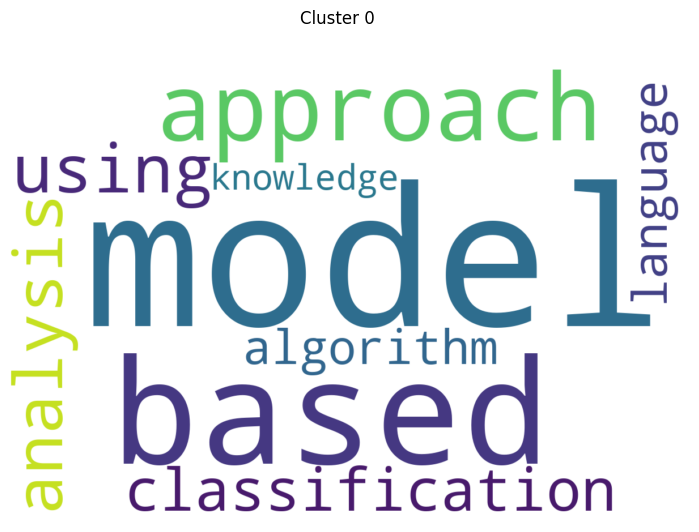

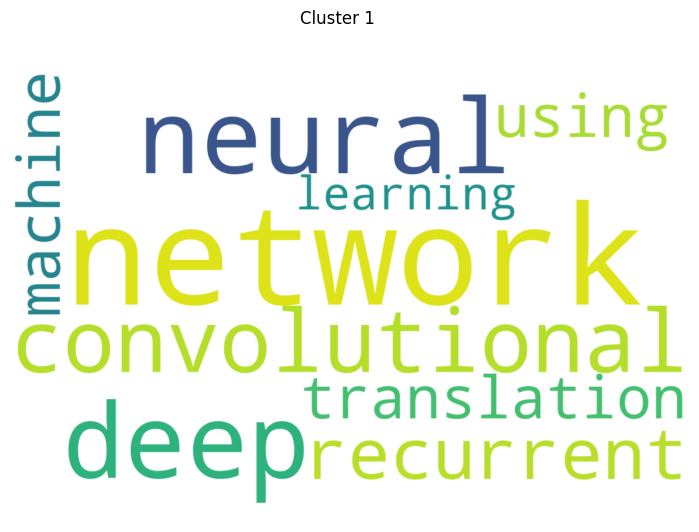

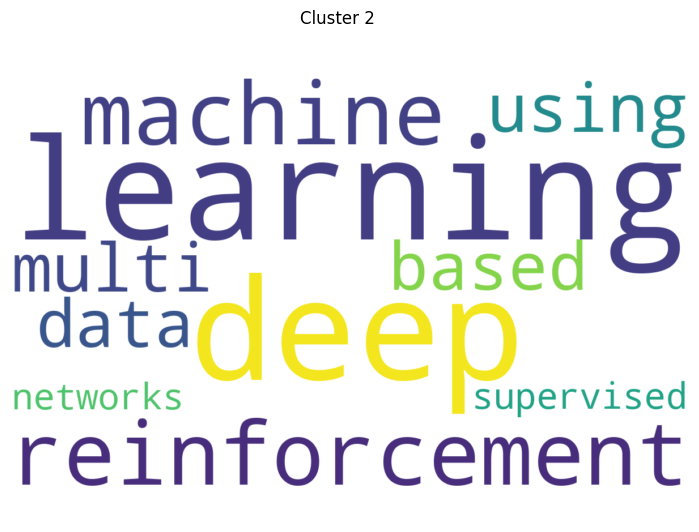

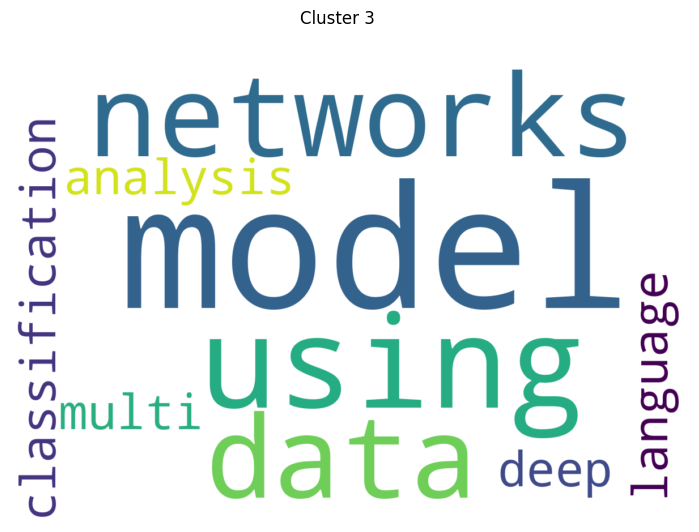

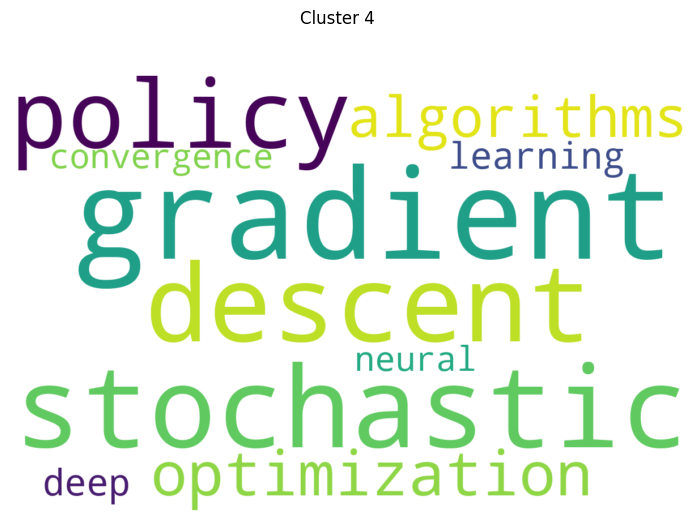

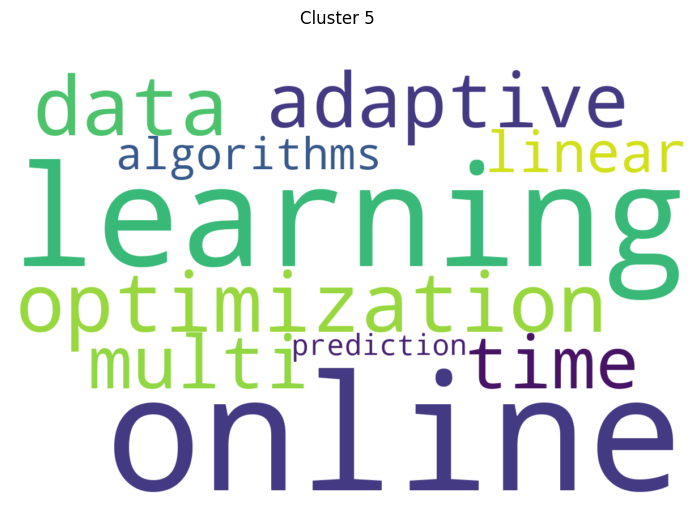

In [20]:
# Print top terms per cluster and generate word clouds for BOW model
print("Top terms per cluster:")
bow_order_centroids = bow_model.cluster_centers_.argsort()[:, ::-1]
terms = bowVec.get_feature_names()
for i in range(true_k):
    # print("Cluster %d:" % i)
    words = ""
    for ind in bow_order_centroids[i, :10]:
        words = words + terms[ind] + " "
        # print (' %s' % terms[ind])
    wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(words)
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    fig.suptitle(f"Cluster {i}")
    plt.show()

In [21]:
# Testing the Clustering based on BOW model
# Predict the cluster association of each paper

prediction = bow_model.predict(X_test)
print(X_train.shape)
print(X_test.shape)
df = pd.DataFrame(list(zip(test_title, prediction)), columns =['Title', 'Cluster ID'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# display(df)
print(df.head(10).loc[:,df.head(10).any()].to_markdown())
# display(df.loc[df['Cluster ID'] == 1])

(11090, 9172)
(637, 9172)
|    | Title                                                                                              |   Cluster ID |
|---:|:---------------------------------------------------------------------------------------------------|-------------:|
|  0 | Neural Modeling of Multi-Predicate Interactions for Japanese Predicate Argument Structure Analysis |            1 |
|  1 | What do Neural Machine Translation Models Learn about Morphology?                                  |            1 |
|  2 | Chunk-based Decoder for Neural Machine Translation                                                 |            1 |
|  3 | Evaluation Metrics for Machine Reading Comprehension: Prerequisite Skills and Readability          |            3 |
|  4 | A Neural Local Coherence Model                                                                     |            1 |
|  5 | Neural Disambiguation of Causal Lexical Markers based on Context                                   |      

## Naive Bayes Classifier

Train Accuracy:  75.60865644724977
Test Accuracy:  58.398744113029835


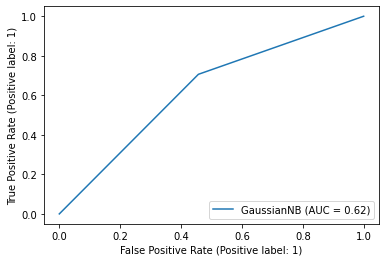

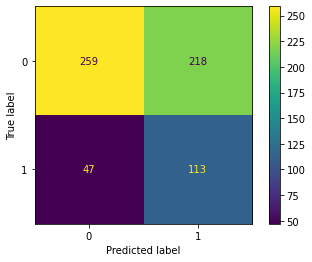

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

mygnb = GaussianNB()
mygnb = mygnb.fit(X_train.toarray(), train_label)

## test
#print(mygnb.predict(X_test[0]), test_label[0])

train_preds = mygnb.predict(X_train.toarray())
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = mygnb.predict(X_test.toarray())
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(mygnb, X_test.toarray(), test_label)
ConfusionMatrixDisplay.from_estimator(mygnb, X_test.toarray(), test_label)
plt.show()

## KNN Classifier

Train Accuracy:  84.01262398557259
Test Accuracy:  69.5447409733124


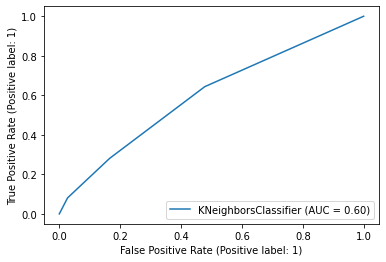

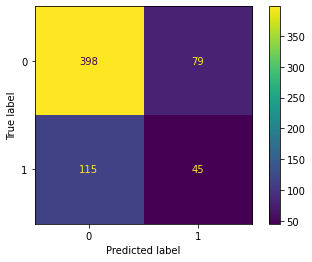

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

## KNN classifier
## hyperparams
num_neighbs = 3
myKNN = KNeighborsClassifier(n_neighbors=num_neighbs)

## BOW fts
myKNN.fit(X_train, train_label)

## test
#print(neigh.predict(X_test[0]), test_label[0])

train_preds = myKNN.predict(X_train)
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = myKNN.predict(X_test)
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(myKNN, X_test, test_label)
ConfusionMatrixDisplay.from_estimator(myKNN, X_test, test_label)
plt.show()


## Logistic Regression 

Train Accuracy:  86.31199278629396
Test Accuracy:  75.35321821036108


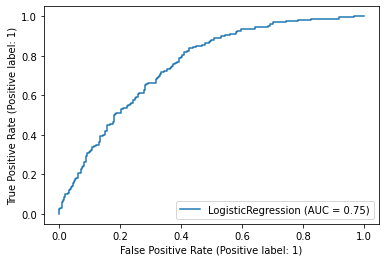

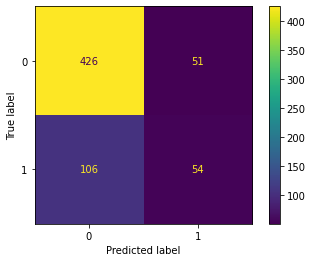

In [25]:
from sklearn.linear_model import LogisticRegression

mylreg = LogisticRegression()
mylreg = mylreg.fit(X_train, train_label)

## test
#print(mylreg.predict(X_test[0]), test_label[0])

train_preds = mylreg.predict(X_train)
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = mylreg.predict(X_test)
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(mylreg, X_test, test_label)
ConfusionMatrixDisplay.from_estimator(mylreg, X_test, test_label)
plt.show()

## Decision Tree Classifier

Train Accuracy:  99.76555455365194
Test Accuracy:  73.31240188383046


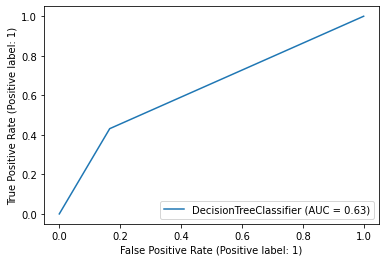

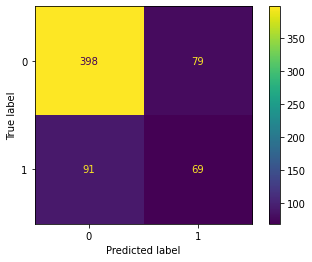

In [26]:
from sklearn import tree
from sklearn.metrics import accuracy_score

mydtree = tree.DecisionTreeClassifier()
mydtree = mydtree.fit(X_train, train_label)

## test
#print(mydtree.predict(X_test[0]), test_label[0])

train_preds = mydtree.predict(X_train)
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = mydtree.predict(X_test)
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(mydtree, X_test, test_label)
ConfusionMatrixDisplay.from_estimator(mydtree, X_test, test_label)
plt.show()

## Random Forest Classifier

Train Accuracy:  87.24075743913436
Test Accuracy:  76.29513343799059


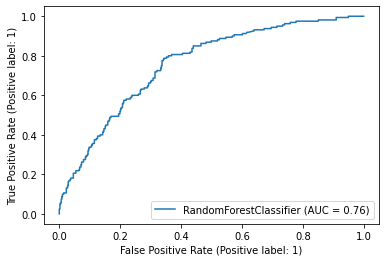

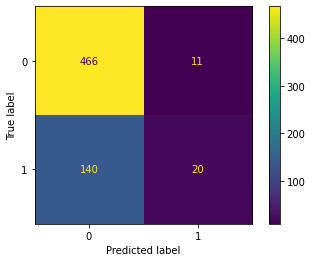

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## hyperparams
max_depth = 100#None  ## None for pure dtrees
n_estimators = 100
criterion = 'gini' #'entropy'

myrforest = RandomForestClassifier(max_depth=max_depth, n_estimators= n_estimators, criterion=criterion)
myrforest = myrforest.fit(X_train, train_label)

## test
#print(myrforest.predict(X_test[0]), test_label[0])

train_preds = myrforest.predict(X_train)
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = myrforest.predict(X_test)
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(myrforest, X_test.toarray(), test_label)
ConfusionMatrixDisplay.from_estimator(myrforest, X_test.toarray(), test_label)
plt.show()


## SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  ## for data centering 
from sklearn.pipeline import make_pipeline   ## sequential pipelining
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

mysvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
mysvm = mysvm.fit(X_train.toarray(), train_label)

## test
#print(mysvm.predict(X_test[0]), test_label[0])

train_preds = mysvm.predict(X_train.toarray())
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = mysvm.predict(X_test.toarray())
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))

## visualize
RocCurveDisplay.from_estimator(mysvm, X_test.toarray(), test_label)
ConfusionMatrixDisplay.from_estimator(mysvm, X_test.toarray(), test_label)
plt.show()


## MLP (neural network) Classifier

Train Accuracy:  99.51307484220018
Test Accuracy:  72.68445839874411


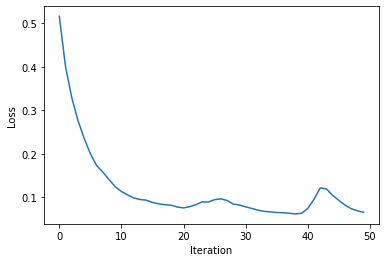

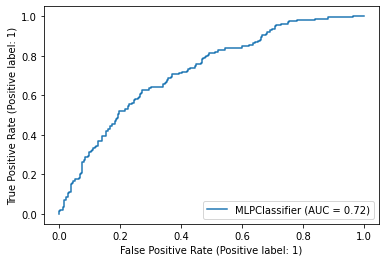

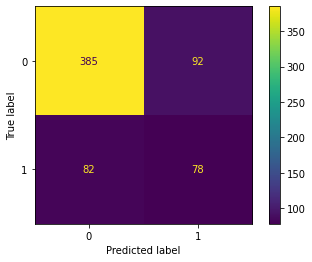

In [28]:
from sklearn.neural_network import MLPClassifier

##hyperparams
h_lrs = 7
acts = 'relu' #'identity', 'logistic', 'tanh'
solver = 'adam' #'sgd'
l2_reg = 0.01
batch_size = 'auto'
lr_init = 0.01 #0.001
lr_type = 'adaptive' #'constant', 'invscaling', 'adaptive'
early_stopping = False #True
validation_fraction = 0.05

mymlp = MLPClassifier(hidden_layer_sizes=h_lrs, activation=acts, early_stopping=early_stopping, 
                    validation_fraction=validation_fraction, solver=solver, 
                      learning_rate_init = lr_init, learning_rate=lr_type, 
                      alpha = l2_reg, batch_size=batch_size, max_iter=10000)

mymlp = mymlp.fit(X_train, train_label)

loss_curve = mymlp.loss_curve_

plt.plot(loss_curve)
plt.xlabel("Iteration")
plt.ylabel("Loss")

## test
#print(mymlp.predict(X_test[0]), test_label[0])

train_preds = mymlp.predict(X_train.toarray())
print("Train Accuracy: ", 100*accuracy_score(train_preds, train_label))

test_preds = mymlp.predict(X_test.toarray())
print("Test Accuracy: ", 100*accuracy_score(test_preds, test_label))


## visualize
RocCurveDisplay.from_estimator(mymlp, X_test.toarray(), test_label)
ConfusionMatrixDisplay.from_estimator(mymlp, X_test.toarray(), test_label)
plt.show()


# TFIDF PART

In [150]:
# fitting and defining tf-idf from our corpus
tfidfVec = TfidfVectorizer(preprocessor=preprocess_text, stop_words='english')
tfidfVec = tfidfVec.fit(merged_data)

## get tfidf feat rep
X_train = tfidfVec.transform(train_data)  
X_test = tfidfVec.transform(test_data)

## display
tf_idf_df=pd.DataFrame(X_train.toarray(),columns=tfidfVec.get_feature_names_out())
display(tf_idf_df.head(5).loc[:,tf_idf_df.head(5).any()])
print(tf_idf_df.head(5).loc[:,tf_idf_df.head(5).any()].iloc[:, : 10].to_markdown())

,analysis,argument,based,chunk,coherence,comprehension,decoder,evaluation,interactions,japanese,...,morphology,multi,neural,predicate,prerequisite,readability,reading,skills,structure,translation
0,0.14581,0.321137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308037,0.339601,...,0.000000,0.20798,0.102000,0.679202,0.000000,0.000000,0.000000,0.000000,0.289573,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.554981,0.00000,0.166691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.415684
2,0.00000,0.000000,0.309153,0.566028,0.000000,0.000000,0.482643,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.170009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423958
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.329165,0.000000,0.338603,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.386034,0.386034,0.338603,0.386034,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.671563,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.201707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


|    |   analysis |   argument |    based |    chunk |   coherence |   comprehension |   decoder |   evaluation |   interactions |   japanese |
|---:|-----------:|-----------:|---------:|---------:|------------:|----------------:|----------:|-------------:|---------------:|-----------:|
|  0 |    0.14581 |   0.321137 | 0        | 0        |    0        |        0        |  0        |     0        |       0.308037 |   0.339601 |
|  1 |    0       |   0        | 0        | 0        |    0        |        0        |  0        |     0        |       0        |   0        |
|  2 |    0       |   0        | 0.309153 | 0.566028 |    0        |        0        |  0.482643 |     0        |       0        |   0        |
|  3 |    0       |   0        | 0        | 0        |    0        |        0.329165 |  0        |     0.338603 |       0        |   0        |
|  4 |    0       |   0        | 0        | 0        |    0.671563 |        0        |  0        |     0        |       0        |   0  

In [15]:
# Dimension reduction on TF-IDF using SVD
on_svd = False

'''
svd = TruncatedSVD(n_components=500, n_iter=10, random_state=42)
X_new = svd.fit_transform(X)
X_train_svd = X_new[0:len(train_data)]
X_test_svd = X_new[len(train_data):]
'''

'\nsvd = TruncatedSVD(n_components=500, n_iter=10, random_state=42)\nX_new = svd.fit_transform(X)\nX_train_svd = X_new[0:len(train_data)]\nX_test_svd = X_new[len(train_data):]\n'

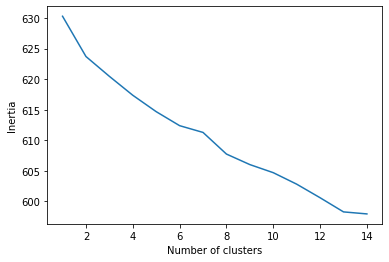

In [16]:
# cluster documents based on tf-idf scores
distortions = []
K = range(1,15)

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10)
    if(on_svd):
        model.fit(X_train_svd)
    else:
        model.fit(X_train)
    distortions.append(model.inertia_)

plt.plot(K, distortions)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# print(distortions)

# Choosing the best k from elbow method.
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=10)
if(on_svd):
    model.fit(X_train_svd)
else:
    model.fit(X_train)

Top terms per cluster:


/home/inspire/miniconda3/envs/ml_hw3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


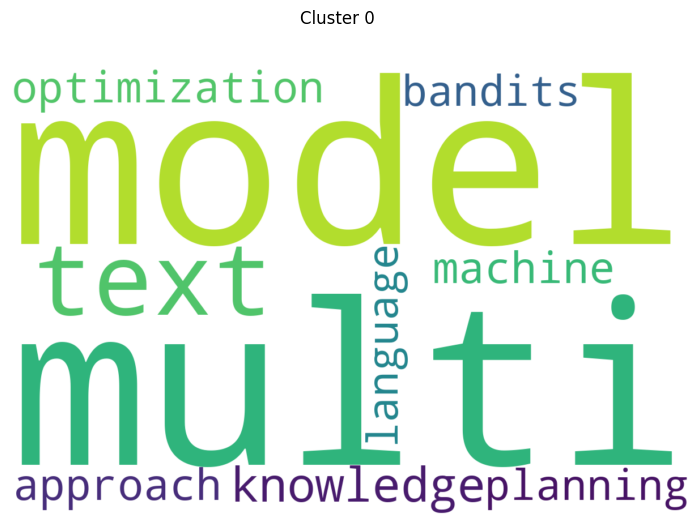

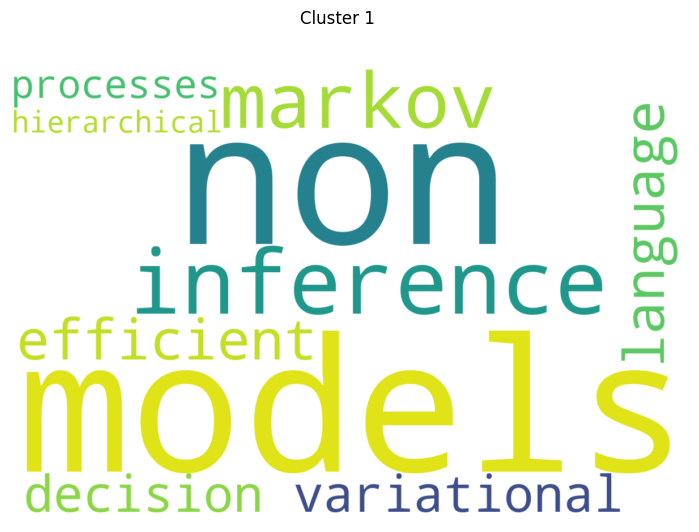

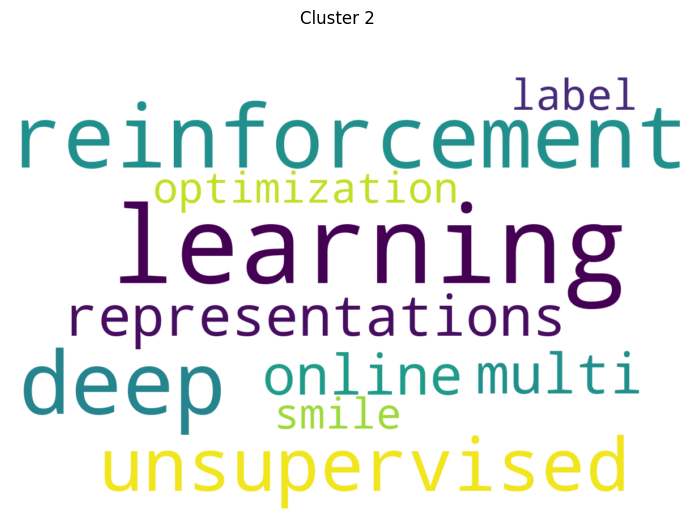

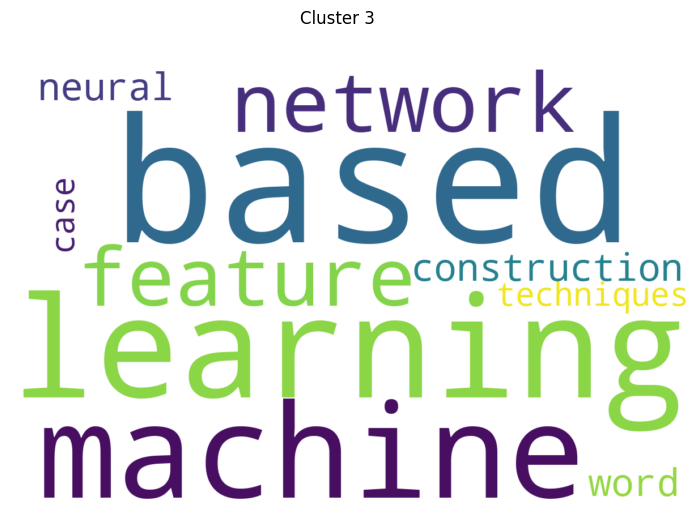

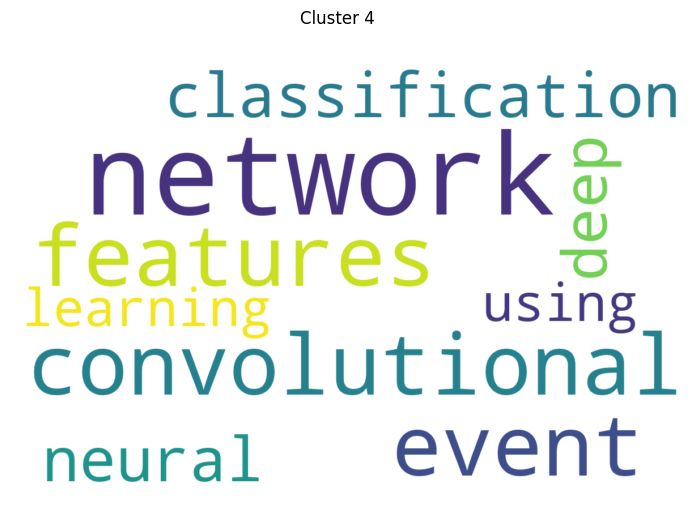

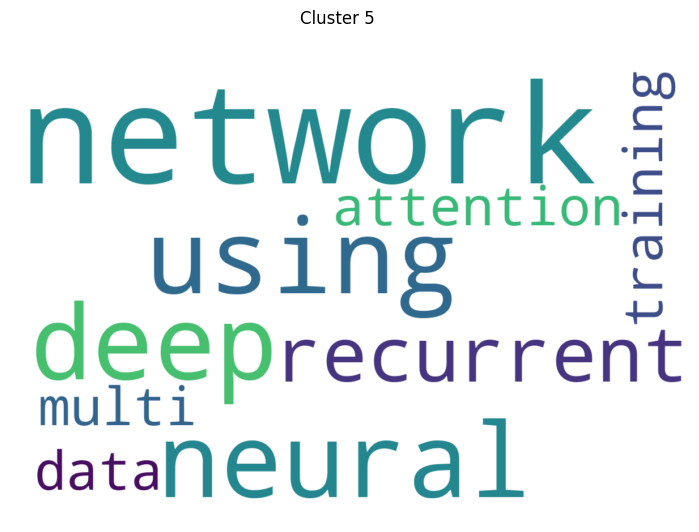

In [17]:
# Print top terms per cluster and generate word clouds
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    # print("Cluster %d:" % i)
    words = ""
    for ind in order_centroids[i, :10]:
        words = words + terms[ind] + " "
        # print (' %s' % terms[ind])
    wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(words)
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    fig.suptitle(f"Cluster {i}")
    plt.show()

In [18]:
# Testing the Model
# Predict the cluster association of each paper
prediction = model.predict(X_test)
print(X_train.shape)
print(X_test.shape)
df = pd.DataFrame(list(zip(test_title, prediction)), columns =['Title', 'Cluster ID'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# display(df)
print(df.head(10).loc[:,df.head(10).any()].to_markdown())
# display(df.loc[df['Cluster ID'] == 1])

(637, 1867)
(637, 1867)
|    | Title                                                    |
|---:|:---------------------------------------------------------|
|  0 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  1 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  2 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  3 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  4 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  5 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  6 | Cross-lingual Name Tagging and Linking for 282 Languages |
|  7 | Fisher Motion Descriptor for Multiview Gait Recognition  |
|  8 | Fisher Motion Descriptor for Multiview Gait Recognition  |
|  9 | Fisher Motion Descriptor for Multiview Gait Recognition  |


Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg option direction
Ignored unknown kwarg opt

KMeans(max_iter=1000, n_clusters=6)

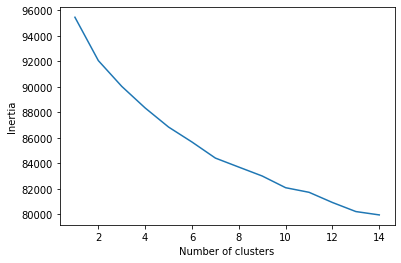

In [17]:
# BERT Encoding using SentenceTransformer and pre-trained distillbert model

embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
embeddings = embedder.encode(merged_data)

X_train = embeddings[0:len(train_data)]
X_test = embeddings[len(train_data):]

# K-means clustering on BERT encoding

bert_distortions = []
K = range(1,15)
for k in K:
    bert_model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10)
    bert_model.fit(X_train)
    bert_distortions.append(bert_model.inertia_)

plt.plot(K, bert_distortions)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# print(distortions)

# Choosing the best k from elbow method.
true_k = 6
bert_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=10)
bert_model.fit(X_train)

In [18]:
# Print top terms per cluster and generate word clouds for BERT model
print("Top terms per cluster:")
bert_order_centroids = bert_model.cluster_centers_.argsort()[:, ::-1]
terms = embeddings.get_feature_names()
for i in range(true_k):
    # print("Cluster %d:" % i)
    words = ""
    for ind in bert_order_centroids[i, :10]:
        words = words + terms[ind] + " "
        # print (' %s' % terms[ind])
    wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(words)
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    fig.suptitle(f"Cluster {i}")
    plt.show()

Top terms per cluster:


AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names'

In [ ]:
# Predict the clusters using BERT encoded model
bert_prediction = bert_model.predict(X_test)
print(X_train.shape)
print(X_test.shape)
bert_df = pd.DataFrame(list(zip(test_title, prediction)), columns =['Title', 'Cluster ID'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# display(df)
print(bert_df.head(10).loc[:,bert_df.head(10).any()].to_markdown())
# display(df.loc[df['Cluster ID'] == 1])